In [41]:
from os import path, mkdir
import numpy as np
np.random.seed(1)
import random
random.seed(1)
import tensorflow as tf
tf.set_random_seed(1)
import timeit
import cv2
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler #, TensorBoard
import keras.backend as K
import pandas as pd
from tqdm import tqdm
from keras import metrics
from abc import abstractmethod
from keras.preprocessing.image import Iterator
import time
from skimage import measure
from skimage.morphology import square, erosion, dilation, watershed
from skimage.filters import median
from skimage.segmentation import find_boundaries
from glob import glob
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
weights = glob('../../input/train/masks/*.png')

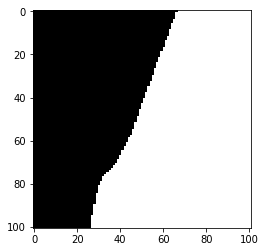

In [50]:
msk = cv2.imread(weights[5])
plt.imshow(msk)

In [51]:
msk.shape

(101, 101, 3)

In [38]:
labels = measure.label(msk, neighbors=8, background=0)
# tmp = dilation(labels > 0, square(9))  
tmp2 = watershed(labels, labels, mask=msk, watershed_line=True) > 0

/home/kownse/anaconda3/lib/python3.6/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)


In [47]:
boundry = find_boundaries(msk)

In [48]:
boundry.max()

True

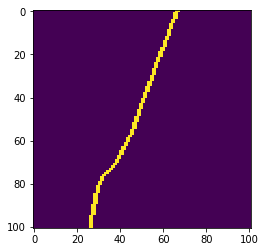

In [49]:
plt.imshow(boundry[...,1])

In [ ]:
labels = measure.label(labels, neighbors=8, background=0)
 
tmp2 = watershed(tmp, labels, mask=tmp, watershed_line=True) > 0
tmp = tmp ^ tmp2
tmp = dilation(tmp, square(7))
msk = (255 * tmp).astype('uint8')

props = measure.regionprops(labels)
msk0 = 255 * (labels > 0)
msk0 = msk0.astype('uint8')

msk1 = np.zeros_like(labels, dtype='bool')